In [1]:
import filecmp
import os
import subprocess
import tempfile
import numpy
import scipy
from scipy.io import wavfile

path_to_ESC = './ESC-50-master/audio'
os.listdir(path_to_ESC)

y = [12, 4, 7]

X_data = []
y_data = []

for file in os.listdir(path_to_ESC):
    if file.split('.')[1] == 'wav':
        if int(file.split('.')[0].split('-')[-1]) in y:
            rate, audio = wavfile.read(path_to_ESC +'/'+ file)
            X_data.append(audio)
            y_data.append(file.split('.')[0].split('-')[-1])
            

In [2]:
X_data[0]

array([128, 105, 125, ...,  16,   2,  -4], dtype=int16)

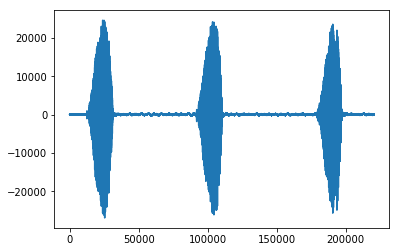

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_data[1])
plt.show()

## Dict. train 

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May  5 16:02:23 2018
@author: qcat
"""
import time
import filecmp
import os
import subprocess
import tempfile
import numpy as np
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning
from scipy.fftpack import dct
from sklearn.linear_model import OrthogonalMatchingPursuit

def Generate_Y(X,n_features):
    X_f = []
    for i in X:
#        X_f.append(np.fft.fft(i))
        X_f.append(dct(i))
    Y = np.empty([256,861])
    for i in range(40):
        x = np.array(X_f[i])
        n = np.floor(x.shape[0]/n_features)
        x = x[:int(n * n_features)]
        x = np.reshape(x,(256,-1))
        Y = np.hstack((Y,x))
    Y = Y[:,861:]
#    print(Y.shape)
    return Y

path_to_ESC = './ESC-50-master/audio'
#os.listdir(path_to_ESC)

y = [45,22] # train vs clapping
X = [[] for i in range(len(y))]

X_data = []
y_data = []
X_1 = []
X_2 = []

for file in os.listdir(path_to_ESC):
    if file.split('.')[1] == 'wav':
        if int(file.split('.')[0].split('-')[-1]) in y:
            rate, audio = wavfile.read(path_to_ESC +'/'+ file)
            #X_data.append(audio)
            #y_data.append(file.split('.')[0].split('-')[-1])
            for ite in range(len(y)):
                if int(file.split('.')[0].split('-')[-1]) == y[ite]:
                    X[ite].append(audio)
                



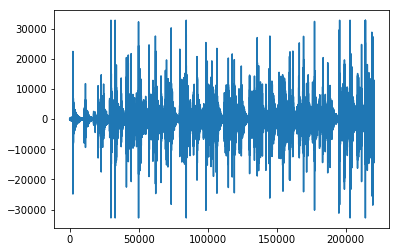

In [5]:
import matplotlib.pyplot as plt

plt.plot(X[1][0])
plt.show()

In [6]:
n = 40

Y = Generate_Y(X[1],256)
Y_train = Y[:,0:861*n].T
print('Y_train.shape: ', Y_train.shape)
print(time.asctime())

if os.path.exists('./Dict_clapping.npy'):
    D = np.load('./Dict_clapping.npy')
    D = D.T
    print('init D: ', D.shape)

    dict = DictionaryLearning(n_components = 500,max_iter = 3,transform_n_nonzero_coefs=5, n_jobs = 4, 
                              fit_algorithm = 'lars',
                             transform_algorithm = 'lasso_lars'
                              , dict_init = D
                             )
else:
    dict = DictionaryLearning(n_components = 500,max_iter = 3,transform_n_nonzero_coefs=5, n_jobs = 4, 
                              fit_algorithm = 'lars',
                             transform_algorithm = 'lasso_lars'
                             )

D = dict.fit(Y_train).components_
D = D.T
print(D.shape)
np.save('./Dict_clapping.npy',D)
print(time.asctime())

Y_train.shape:  (34440, 256)
Sun May  6 03:38:53 2018
init D:  (500, 256)
(256, 500)
Sun May  6 06:05:42 2018


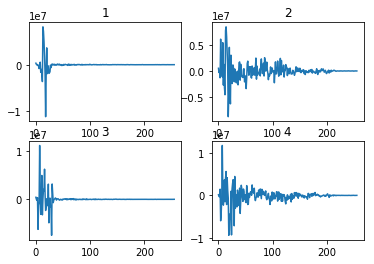

In [7]:
Y_test = Y[:,0:861]
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
omp.fit(D,Y_test)
coef = omp.coef_
#idx_r, = coef.nonzero()
#plt.stem(idx_r, coef[idx_r])
plt.subplot(221)
t=coef[0,:]
yy = np.matmul(D,t)
plt.plot(yy)
plt.title('1')
plt.subplot(222)
plt.plot(Y_test[:,0])
plt.title('2')
plt.subplot(223)
t=coef[1,:]
yy = np.matmul(D,t)
plt.plot(yy)
plt.title('3')
plt.subplot(224)
plt.plot(Y_test[:,1])
plt.title('4')
plt.show()

In [8]:
n = 40

Y = Generate_Y(X[0],256)
Y_train = Y[:,0:861*n].T
print('Y_train.shape: ', Y_train.shape)
print(time.asctime())

if os.path.exists('./Dict_train.npy'):
    D = np.load('./Dict_train.npy')
    D = D.T
    print('init D: ', D.shape)

    dict = DictionaryLearning(n_components = 500,max_iter = 3,transform_n_nonzero_coefs=5, n_jobs = 4, 
                              fit_algorithm = 'lars',
                             transform_algorithm = 'lasso_lars'
                              , dict_init = D
                             )
else:
    dict = DictionaryLearning(n_components = 500,max_iter = 3,transform_n_nonzero_coefs=5, n_jobs = 4, 
                              fit_algorithm = 'lars',
                             transform_algorithm = 'lasso_lars'
                             )

D = dict.fit(Y_train).components_
D = D.T
print(D.shape)
np.save('./Dict_train.npy',D)
print(time.asctime())




Y_train.shape:  (34440, 256)
Sun May  6 06:05:44 2018
init D:  (500, 256)
(256, 500)
Sun May  6 07:53:51 2018


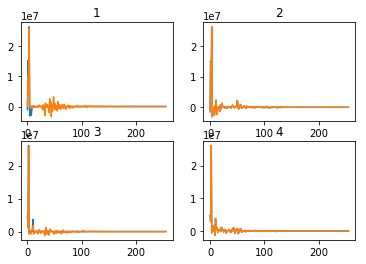

In [12]:
Y_test = Y[:,0:861]
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
omp.fit(D,Y_test)
coef = omp.coef_
#idx_r, = coef.nonzero()
#plt.stem(idx_r, coef[idx_r])
plt.subplot(221)
t=coef[0,:]
yy = np.matmul(D,t)
plt.plot(yy)
plt.title('1')
plt.subplot(222)
plt.plot(Y_test[:,0])
plt.title('2')
plt.subplot(223)
t=coef[1,:]
yy = np.matmul(D,t)
plt.plot(yy)
plt.title('3')
plt.subplot(224)
plt.plot(Y_test[:,1])
plt.title('4')
plt.show()

In [10]:
D = np.load('./Dict_train.npy')
print(D.shape)
D = np.load('./Dict_clapping.npy')
print(D.shape)

(256, 500)
(256, 500)


In [11]:
import time
print(time.asctime())

Sun May  6 07:53:52 2018
